In [1]:
from RCNNModel_Parking import RCNNModel
import matplotlib.pyplot as plt
from matplotlib import path
import matplotlib.ticker as ticker
import numpy as np
import cv2
import math, time, glob
%matplotlib inline

In [34]:
class DataAnalysis():
    
    def helper_calcCentroid(self, topCoord, btmCoord):
        w = btmCoord[0] - topCoord[0]
        h = btmCoord[1] - topCoord[1]
        return [(topCoord[0]+w/2), (topCoord[1]+h/2)]
    
    def showPixelFreeSpaceGraph(self, freePixelSpaceArray, totalTime):      
        secondInterval = np.arange(0, (totalTime+1)*15, 15)
        print "SecondInterval: ", secondInterval
        print "FreePixelSpace: ", freePixelSpaceArray
        
        plt.title("Free Space in Pixels")
        axis = [-20, (totalTime+1)*16, 150, 600]
        plt.axis(axis)
        plt.xticks(np.arange(0, (totalTime+1)*16, 60))
        plt.xlabel('Time (sec)')
        plt.ylabel('Free Space (pixels)')
        
        plt.plot(secondInterval[1:], freePixelSpaceArray[1:], 'k')
        plt.plot(secondInterval[1:], freePixelSpaceArray[1:], 'bo')
        
        plt.plot((axis[0], axis[1]), (300, 300), 'r--')
        plt.plot((axis[0], axis[1]), (475, 475), 'r--')
        plt.plot((axis[0], axis[1]), (789, 789), 'r--')
        plt.plot((axis[0], axis[1]), (1052, 1052), 'r--')
    
    ###RawX Coordinates
    def convertRawXCoordToDist(self, freeSpaceArray, multiplyFactor):
        pairNum = 0
        totalFtinRawDist = 0
        while pairNum < len(freeSpaceArray):
            dist = freeSpaceArray[pairNum+1] - freeSpaceArray[pairNum]
            if dist < 0:
                print "DIST WAS NEGATIVE. SETTING TO 0"
                dist = 0
            print "raw dist: ", dist
            rawDistFtperPx = dist*multiplyFactor
            print "rawDistFtperPx: ", rawDistFtperPx
            totalFtinRawDist += rawDistFtperPx
            pairNum += 2
        print "Total Feet for Raw Dist: ", totalFtinRawDist
        return totalFtinRawDist
    
    def showRawDistFreeSpaceGraph(self, freeRawDistSpaceArray, totalTime):
        secondInterval = np.arange(0, (totalTime+1)*15, 15)
        print "SecondInterval: ", secondInterval
        print "FreePixelSpace: ", freeRawDistSpaceArray
        
        plt.title("Free Space in Feet (Raw Coordinates)")
        axis = [-20, (totalTime+1)*16, 10, 45]
        plt.axis(axis)
        plt.xticks(np.arange(0, (totalTime+1)*16, 60))
        plt.xlabel('Time (sec)')
        plt.ylabel('Free Space (Feet)')
        
        plt.plot(secondInterval[1:], freeRawDistSpaceArray[1:], 'k')
        plt.plot(secondInterval[1:], freeRawDistSpaceArray[1:], 'bo')
        
        plt.text((totalTime+1)*12, 18, r'1 Empty Spot')
        plt.plot((axis[0], axis[1]), (20, 20), 'r--')
        plt.text((totalTime+1)*12, 38, r'2 Empty Spot')
        plt.plot((axis[0], axis[1]), (40, 40), 'r--')
    
    ###Estimated Coordinates
    def pixelsToEstCoord(self, freeSpaceArray):
        extrapArray = []
        for xcoord in freeSpaceArray:
            extrapArray.append(self.extrapCoordinates(xcoord))
        print "extrapArray: ", extrapArray
        return extrapArray
        
    def extrapCoordinates(self, raw_x_coord):
        w_factor = [ -6.41328433e-04,   3.65880005e-07,   1.26635656e+00]
        inputArray = np.array([raw_x_coord, raw_x_coord**2, 1])
        calculatedScaleFactor = inputArray.dot(w_factor)
        projectedCoordinate = raw_x_coord*calculatedScaleFactor
        return projectedCoordinate
    
    def showEstDistFreeSpaceGraph(self, freeEstDistSpaceArray, totalTime, time):
        totalTime = totalTime/2
        secondInterval = np.arange(0, (totalTime+1)*15, 15)
        print "SecondInterval: ", secondInterval
        print "EstimatedPixelSpace: ", freeEstDistSpaceArray
        
        plt.figure(figsize=(10, 8))
        plt.title("Estimated Coordinates Free Space in Feet at {0}".format(time))
        axis = [-20, (totalTime+1)*16, 0, 85]
        plt.axis(axis)
        plt.xticks(np.arange(0, (totalTime+1)*16, 60))
        plt.xlabel('Time (sec)')
        plt.ylabel('Free Space (Feet)')
        
        plt.plot(secondInterval[1:], freeEstDistSpaceArray[1:], 'k')
        plt.plot(secondInterval[1:], freeEstDistSpaceArray[1:], 'bo')
        
        plt.text((totalTime+1)*12, 18, r'1 Empty Spot')
        plt.plot((axis[0], axis[1]), (20, 20), 'r--')
        plt.text((totalTime+1)*12, 38, r'2 Empty Spot')
        plt.plot((axis[0], axis[1]), (40, 40), 'r--')
        plt.text((totalTime+1)*12, 58, r'3 Empty Spot')
        plt.plot((axis[0], axis[1]), (60, 60), 'r--')
        plt.text((totalTime+1)*12, 78, r'4 Empty Spot')
        plt.plot((axis[0], axis[1]), (80, 80), 'r--')
        
        plt.savefig("EstDistances_{0}_expand_30fps_sp0-4.png".format(time))
        
    ###Combining graphs to show similarities/differences    
    def showFreeSpaceGraphsOnePicture(self, FSA1, FSA2, totalTime):
        f, axarr = plt.subplots(2, sharex=True)
        
        secondInterval = np.arange(0, (totalTime+1)*15, 15)
        axis = [-20, (totalTime+1)*16, 150, 600]
        plt.axis(axis)
        plt.xticks(np.arange(0, (totalTime+1)*16, 60))
        plt.xlabel('Time (sec)')
        plt.ylabel('Free Space (Feet)')
        axarr[0].plot(secondInterval[1:], FSA1[1:], 'k')
        axarr[0].plot(secondInterval[1:], FSA1[1:], 'ro')
        
        axis = [-20, (totalTime+1)*16, 10, 50]
        plt.axis(axis)
        plt.xticks(np.arange(0, (totalTime+1)*16, 60))
        plt.xlabel('Time (sec)')
        plt.ylabel('Free Space (Feet)')
        axarr[1].plot(secondInterval[1:], FSA2[1:], 'bo')
        axarr[1].plot(secondInterval[1:], FSA2[1:], 'k')   
        
    def showFreeSpaceCoord(self, rawCoordArray, estCoordArray, totalTime):
        secondInterval = np.arange(0, (totalTime+1)*15, 15)
        print "SecondInterval: ", secondInterval
        
        plt.title("Free Space in Feet (Estimated Coordinates)")
        axis = [-20, (totalTime+1)*16, 10, 50]
        plt.axis(axis)
        plt.xticks(np.arange(0, (totalTime+1)*16, 60))
        plt.xlabel('Time (sec)')
        plt.ylabel('Free Space (Feet)')
        
        plt.plot(secondInterval[1:], rawCoordArray[1:], 'ro', label='Raw Coord')
        plt.plot(secondInterval[1:], rawCoordArray[1:], 'k')
        plt.plot(secondInterval[1:], estCoordArray[1:], 'bo', label="Est Coord")
        plt.plot(secondInterval[1:], estCoordArray[1:], 'k')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        plt.text((totalTime+1)*12, 18, r'1 Empty Spot')
        plt.plot((axis[0], axis[1]), (20, 20), 'r--')
        plt.text((totalTime+1)*12, 38, r'2 Empty Spot')
        plt.plot((axis[0], axis[1]), (40, 40), 'r--')
        

In [23]:
class Video():

#     def __init__(self, videoPath):
#         self.videoPath = videoPath
        
    def turnImg(self, image):
        rows, cols, color = image.shape
        M = cv2.getRotationMatrix2D((cols/2, rows/2), 2, 1)
        dst = cv2.warpAffine(image, M, (cols, rows))
        return dst
        
    def detectCars(self, netmodel):
        frame_detections = []            
        dets = netmodel.carDetectionMethod(rotate)
        for det in dets:
            bbox = det[:4]
            if (bbox[2]-bbox[0])<700:
                if bbox[3] < 591:
                    frame_detections.append(bbox)
                    cv2.rectangle(rotate,(bbox[0], bbox[1]),(bbox[2], bbox[3]), (0, 255, 0), 3 )
                else:
                    cv2.rectangle(rotate,(bbox[0], bbox[1]),(bbox[2], bbox[3]), (255, 0, 0), 3 )
        
        cv2.line(rotate, (0,590), (1599,590), (255, 0, 0), 3)
        return frame_detections
    
    #Note: If the spots are not physically marked (free space), create another method that color 
    #codes the empty space between the spaces
    def drawSpotsOccupyStatus(self, copyImg):
#         for spot in allParking.allSpots[1:5]:
        for spot in allParking.allSpots[:5]:
            if spot.occupyStatus == "available":
                cv2.polylines(copyImg, [spot.staticBbox], False, (0,255, 0), 3)
            else:
                cv2.polylines(copyImg, [spot.staticBbox], False, (255, 0, 0), 3)
                
            font = cv2.FONT_HERSHEY_SIMPLEX
            text = "ID: {0}, Occ: {1}, Stat: {2}".format(spot.ID, spot.occlusion, spot.occupyStatus)
            cv2.putText(copyImg,text, (spot.staticBbox[0][0], spot.staticBbox[0][1]), font, 0.5,(0,0,255),2)
            
    def drawAvgCenterAndBox(self, image):
#         for spot in allParking.allSpots[1:5]:
        for spot in allParking.allSpots[:5]:
            if len(spot.occupiedCarSize)>0:           
                cv2.circle(image, (spot.averageCenter[0], spot.averageCenter[1]), 3, (255, 255, 0), 3)
                cv2.rectangle(image, (spot.averageBbox[0], spot.averageBbox[1]), 
                                    (spot.averageBbox[2], spot.averageBbox[3]), (255, 255, 255), 3)

    def drawAllCenters(self, image):
#         for spot in allParking.allSpots[1:5]:
        for spot in allParking.allSpots[:5]:
            if len(spot.occupiedCarSize)>0:
                for xy in spot.allCenters:
                    cv2.circle(image, (int(xy[0]), int(xy[1])), 3, (255, 255, 255), 3)


In [24]:
class ParkingSpot():
    
    def __init__(self, spotID, topLeft, topRight, bottomRight, bottomLeft):
        self.ID = spotID
        self.occlusion = 0
        self.occupyStatus = "available"
        self.updatedTag = False
        
        self.staticBbox = np.int32([topLeft, topRight, bottomRight, bottomLeft, topLeft]) #Coordinates of the parking spot's bbox
        self.staticCentroid = analysis.helper_calcCentroid(topLeft, bottomRight)
        
        self.occupiedCarSize = []
        self.allCenters = []
        self.averageWidth = 0
        self.averageHeight = 0
        self.averageCenter = (0,0)
        self.averageBbox = []
        
    def calcAverageWidth(self):
        return sum([x[2]-x[0] for x in self.occupiedCarSize])/len(self.occupiedCarSize)
        
    def calcAverageHeight(self):
        return sum([y[3]-y[1] for y in self.occupiedCarSize])/len(self.occupiedCarSize)
    
    def calcAverageBboxCenter(self):
        allCenters = [analysis.helper_calcCentroid((coord[0], coord[1]), (coord[2], coord[3])) for coord in self.occupiedCarSize]

        xcenter = sum([coord[0] for coord in allCenters])/len(self.occupiedCarSize)
        ycenter = sum([coord[1] for coord in allCenters])/len(self.occupiedCarSize)
        centerPt = (int(xcenter), int(ycenter))

#         print "AllCenters: ", allCenters
        return centerPt
        
    def calcAllCenters(self):
        return [analysis.helper_calcCentroid((coord[0], coord[1]), (coord[2], coord[3])) for coord in self.occupiedCarSize]
    
    def calcAverageBbox(self):
        TopLeft_X = int(self.averageCenter[0]-self.averageWidth/2)
        TopLeft_Y = int(self.averageCenter[1]-self.averageHeight/2)
        BtmRight_X = int(self.averageCenter[0]+self.averageWidth/2)
        BtmRight_Y = int(self.averageCenter[1]+self.averageHeight/2)
        return [TopLeft_X, TopLeft_Y, BtmRight_X, BtmRight_Y]
    
    def updateAverages(self):
        if len(self.occupiedCarSize)>0:
            self.averageWidth = self.calcAverageWidth()
            self.averageHeight = self.calcAverageHeight()
            self.averageCenter = self.calcAverageBboxCenter()
            self.allCenters = self.calcAllCenters()
            self.averageBbox = self.calcAverageBbox()


In [25]:
#Note: If the parking spaces are not physically marked, create a sort method to order the cars relative to each other
class ParkingTotalRegion():
    
    def __init__ (self):
        self.allSpots = [ParkingSpot(0, (51, 479), (322, 490), (283, 534), (8, 525)),
                         ParkingSpot(1, (337, 491), (659, 492), (656, 541), (303, 533)), 
                         ParkingSpot(2, (677, 492), (958, 494), (989, 545), (670, 542)), 
                         ParkingSpot(3, (969, 500), (1242, 499), (1300, 539), (1000, 541)), 
                         ParkingSpot(4, (1256, 501), (1435, 493), (1493, 536), (1306, 541)), 
                         ParkingSpot(5, (1450, 495), (1596, 490), (1598, 528), (1505, 535))]
        self.coordOfFreeSpaces = []
    
    def resetUpdateTags(self):
        for spot in self.allSpots:
            spot.updatedTag = False
            
    def updateAllAverages(self):
        for spot in self.allSpots:
            spot.updateAverages()

    def matchParkingSpots(self, carArray):
        for car in carArray:
            detected_centroid = analysis.helper_calcCentroid((car[0], car[1]), (car[2], car[3]))
            matchID = self.calculateNearestParkingSpot(detected_centroid)
#             print "MatchID: ", matchID
            self.allSpots[matchID].updatedTag = True
            self.allSpots[matchID].occlusion = 0
            self.allSpots[matchID].occupiedCarSize.append(car)

            if self.allSpots[matchID].occupyStatus == "available":
                self.allSpots[matchID].occupyStatus = "taken"
            
    def calculateNearestParkingSpot(self, centroid):
        closestSpotID = 10
        shortestDist = 10000
        for spot in self.allSpots:
            dist = self.helper_distance(centroid, spot.staticCentroid)
            closestSpotID = self.helper_pickShortestDistID(dist, shortestDist, spot.ID, closestSpotID)
            shortestDist = min(dist, shortestDist)
            
#             print "FixedParkingSpot Center: ", spot_center[0]
#             print "Distance between the two points: ", dist
#             print "This is the calced shortest distance: ", shortestDist
            
#         print "ANLYSIS DONE: THIS IS THE SHORTEST: ", shortestDist
        print "THIS IS THE SPOT THE CAR OCCUPIES: ", closestSpotID
        
        return closestSpotID
    
    def updateAllSpots(self):
        for spot in self.allSpots:
            if (spot.updatedTag == False) & (spot.occupyStatus == "taken"):
#                 if spot.occlusion > 2:
                if spot.occlusion > 1:
                    spot.occlusion = 0
                    spot.occupiedCarSize = []
                    spot.occupyStatus = "available"
                else:
                    spot.occlusion += 1
    
    #Adapt this method if the parking spaces are not physically defined
    def calculateFreeSpace(self):
#         leftMostX = self.allSpots[1].staticBbox[3][0]
        leftMostX = self.allSpots[0].staticBbox[3][0]
        addedFreeSpacesInPixels = 0
        freeSpaceBboxXCoord = []
        print "Len allSpots: ", len(self.allSpots)
        
        print "CALCULATING FREE SPACE"
#         for counter in range(len(self.allSpots)-2):
        for counter in range(len(self.allSpots)-1):
#             counter += 1
            print "---COUNTER: ", counter
#             print "FarthestX: ", leftMostX
            counterInfo = self.allSpots[counter]
            dist = 0
            
            if counterInfo.occupyStatus == "taken":
                print "compareVal: ", counterInfo.averageBbox[0]
                dist = counterInfo.averageBbox[0] - leftMostX
                freeSpaceBboxXCoord.append(leftMostX)
                print "avgbbox0 > LM: ", counterInfo.averageBbox[0] > 303
#                 if (counterInfo.averageBbox[0] > 303):
#                     print "avgbbox0: ", counterInfo.averageBbox[0]
#                     print "lM: ", leftMostX
                freeSpaceBboxXCoord.append(counterInfo.averageBbox[0])
                print "Updated freeSpaceBboxXCoord with leftMost: ", leftMostX
                print "Updated freeSpaceBboxXCoord with avgbbox[0]: ", counterInfo.averageBbox[0]
                
                leftMostX = counterInfo.averageBbox[2]                
                print "LEFTMOST UPDATED: ", leftMostX
                
            if counter == len(self.allSpots)-2:
                print "counterInfo stat: ", counterInfo.staticBbox[2]
                print "counterInfo avg: ", counterInfo.averageBbox
                print "Adding last bit"
                print "Dist before: ", dist
                freeSpaceBboxXCoord.append(leftMostX)
                dist += counterInfo.staticBbox[2][0] - leftMostX
                print "Updated freeSpaceBboxXCoord with sp4 LM: ", leftMostX
                freeSpaceBboxXCoord.append(counterInfo.staticBbox[2][0])
                print "Updated freeSpaceBboxXCoord with staticbbox20: ", counterInfo.staticBbox[2][0]
                    
            print "DIST: ", dist
            if dist < 0:
#                 print "Distance was negative. Setting to 0"
                dist = 0
            addedFreeSpacesInPixels += dist
#             print "addedFreeSpaces: ", addedFreeSpacesInPixels
        
        print "FreeSpace Array: ", freeSpaceBboxXCoord
        self.coordOfFreeSpaces = freeSpaceBboxXCoord
        return addedFreeSpacesInPixels
    
    def helper_distance(self, pt1, pt2):
        return math.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
    
    def helper_pickShortestDistID(self, dist1, dist2, id1, id2):
        if dist1<dist2:
            return id1
        else:
            return id2
        



Loaded network /home/ubuntu/py-faster-rcnn/data/faster_rcnn_models/VGG16_faster_rcnn_final.caffemodel
FrameNum:  0
allparking:  [array([  20.62778473,  410.94067383,  245.49182129,  526.40783691], dtype=float32), array([ 209.150177  ,  418.94830322,  621.46826172,  552.55401611], dtype=float32)]
THIS IS THE SPOT THE CAR OCCUPIES:  0
THIS IS THE SPOT THE CAR OCCUPIES:  1
Len allSpots:  6
CALCULATING FREE SPACE
---COUNTER:  0
compareVal:  20
avgbbox0 > LM:  False
Updated freeSpaceBboxXCoord with leftMost:  8
Updated freeSpaceBboxXCoord with avgbbox[0]:  20
LEFTMOST UPDATED:  245
DIST:  12
---COUNTER:  1
compareVal:  208
avgbbox0 > LM:  False
Updated freeSpaceBboxXCoord with leftMost:  245
Updated freeSpaceBboxXCoord with avgbbox[0]:  208
LEFTMOST UPDATED:  621
DIST:  -37
---COUNTER:  2
DIST:  0
---COUNTER:  3
DIST:  0
---COUNTER:  4
counterInfo stat:  [1493  536]
counterInfo avg:  []
Adding last bit
Dist before:  0
Updated freeSpaceBboxXCoord with sp4 LM:  621
Updated freeSpaceBboxXCoo

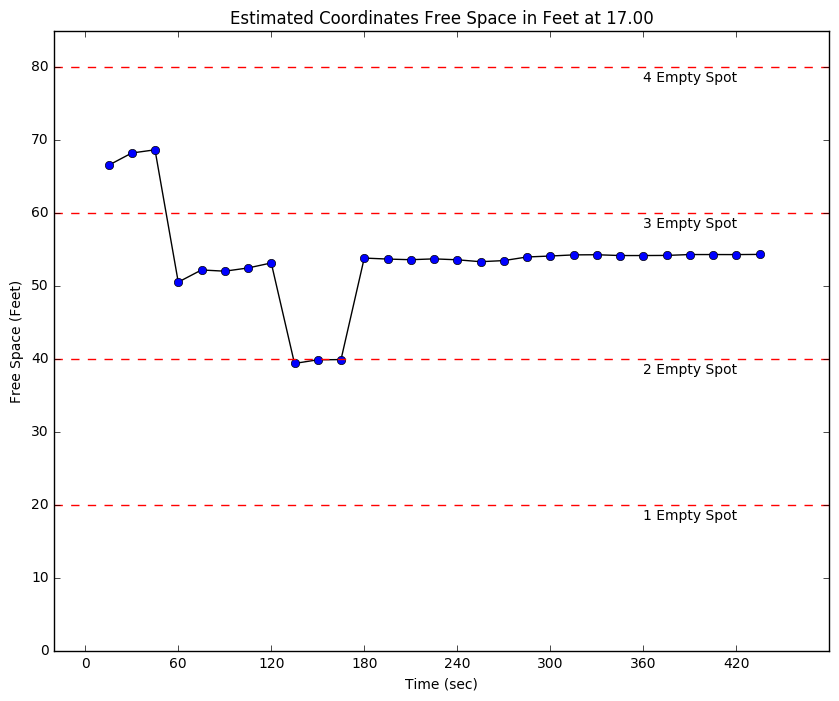

In [39]:
if __name__ == '__main__':
#     video_path = '/home/ubuntu/Parking/Pi10_RW1600_RH1200_TT900_FR15_04_26_2017_11_02_00_654759.h264'
    caffemodel = '/home/ubuntu/py-faster-rcnn/data/faster_rcnn_models/VGG16_faster_rcnn_final.caffemodel'
    prototxt = '/home/ubuntu/py-faster-rcnn/models/pascal_voc/VGG16/faster_rcnn_alt_opt/faster_rcnn_test.pt'
    
    netmodel = RCNNModel(prototxt, caffemodel)
    analysis = DataAnalysis()
#     frames = Video(video_path)
    frames = Video()
    allParking = ParkingTotalRegion()
    
#     allimgs = sorted(glob.glob('./15secImgs2/*.jpg'))
    allimgs = sorted(glob.glob('./04-26_17.00.00/*.jpg'))
    
    arrayDetectedCars = []
    arrayTotalFreeSpaceInPixels = []
    arrayTotalFreeSpaceInRawDist = []
    arrayTotalFreeSpaceInEstDist = []
    for frameNum in range(len(allimgs)):
        if frameNum%2 == 0:
#     for frameNum in range(15):
            print "FrameNum: ", frameNum
            im = cv2.imread("{0}".format(allimgs[frameNum]))
            rotate = frames.turnImg(im)

            allParking.resetUpdateTags()        
            arrayDetectedCars = frames.detectCars(netmodel)
            print "allparking: ", arrayDetectedCars

            if len(arrayDetectedCars)>0:
                allParking.matchParkingSpots(arrayDetectedCars)

            #update all parkingSpots
            allParking.updateAllSpots()
            allParking.updateAllAverages()

            #Run through all spots + analyze average size of car
            #calc how long are each spaces occupied?
            #Size in Pixels
            arrayTotalFreeSpaceInPixels.append(allParking.calculateFreeSpace())
            print "TotalFreeSpaceInPixels: ", arrayTotalFreeSpaceInPixels
            print "self.coordOfFreeSpaces: ", allParking.coordOfFreeSpaces

            #Size Roughly in Feet
            ftperpx = 80.0/1190 #(4parkingx20ft)/(1493-303px)
            rawDistForThisFrame = analysis.convertRawXCoordToDist(allParking.coordOfFreeSpaces, ftperpx)
            print "RawDistForThisFrame: ", rawDistForThisFrame
            arrayTotalFreeSpaceInRawDist.append(rawDistForThisFrame)

            #Size roughly through estimated coord
    #         estftperpx = 80.0/1310 #(4parkingx20ft)/(1650-340px)
            estftperpx = 100.0/1640 #(5parkingx20ft)/(1650-10px)
            estArray = analysis.pixelsToEstCoord(allParking.coordOfFreeSpaces)
            estDistForThisFrame = analysis.convertRawXCoordToDist(estArray, estftperpx)
            print "estDistForThisFrame: ", estDistForThisFrame
            arrayTotalFreeSpaceInEstDist.append(estDistForThisFrame)

            ######Visualizations
            #Visualization and update parking spot graphic
            overlayCopy = rotate.copy()
            frames.drawSpotsOccupyStatus(overlayCopy)

            frames.drawAvgCenterAndBox(rotate)
            frames.drawAllCenters(rotate)

            cv2.addWeighted(overlayCopy, 0.4, rotate, 1 - 0.4, 0, rotate)
    #         plt.imsave('analyzeImages_11_sp05/{0}.jpg'.format(frameNum), rotate)

            print "--------------------------------------------------"
    
    print "RawDistTotalArray: ", arrayTotalFreeSpaceInRawDist
    print "EstDistTotalArray: ", arrayTotalFreeSpaceInEstDist
    
#     analysis.showPixelFreeSpaceGraph(arrayTotalFreeSpaceInPixels, frameNum)
#     analysis.showRawDistFreeSpaceGraph(arrayTotalFreeSpaceInRawDist, frameNum)
analysis.showEstDistFreeSpaceGraph(arrayTotalFreeSpaceInEstDist, frameNum, "17.00")

SecondInterval:  [  0  15  30  45  60  75  90 105 120 135 150 165 180 195 210]
FreePixelSpace:  [747, 497, 278, 311, 315, 311, 320, 318, 318, 321, 320, 317, 320, 322, 321]


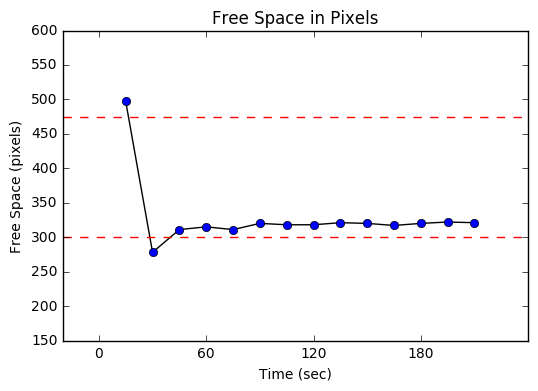

In [52]:
analysis = DataAnalysis()
# print "FrameNum: ", frameNum
analysis.showPixelFreeSpaceGraph(arrayTotalFreeSpaceInPixels, frameNum)

SecondInterval:  [  0  15  30  45  60  75  90 105 120 135 150 165 180 195 210]
FreePixelSpace:  [50.218487394957975, 32.134453781512605, 18.6218487394958, 20.907563025210084, 21.176470588235293, 20.907563025210081, 21.445378151260499, 20.773109243697476, 20.773109243697476, 20.638655462184872, 20.773109243697476, 20.504201680672267, 20.773109243697476, 20.907563025210084, 20.907563025210084]


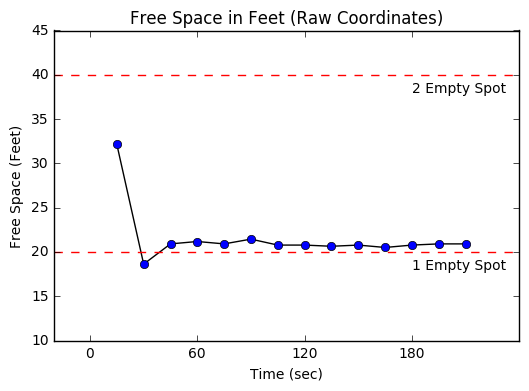

In [47]:
analysis = DataAnalysis()
# print "FrameNum: ", frameNum
# print "RawDistArray: ", arrayTotalFreeSpaceInRawDist
analysis.showRawDistFreeSpaceGraph(arrayTotalFreeSpaceInRawDist, frameNum)

# RawDistTotalArray:  [50.218487394957975, 32.134453781512605, 18.6218487394958, 20.907563025210084, 21.176470588235293, 
#                      20.907563025210081, 21.445378151260499, 20.773109243697476, 20.773109243697476, 20.638655462184872, 
#                      20.773109243697476, 20.504201680672267, 20.773109243697476, 20.907563025210084, 20.907563025210084]

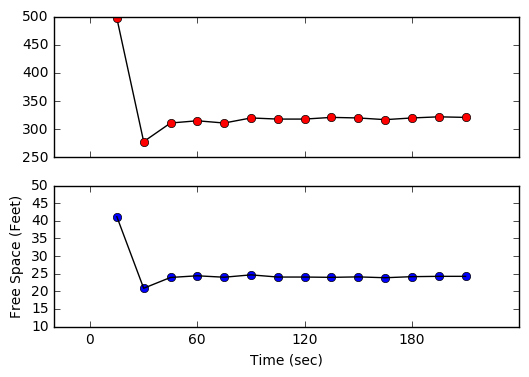

In [89]:
analysis = DataAnalysis()
analysis.showFreeSpaceGraphsOnePicture(arrayTotalFreeSpaceInPixels, arrayTotalFreeSpaceInEstDist, frameNum)

SecondInterval:  [  0  15  30  45  60  75  90 105 120 135 150 165 180 195 210]


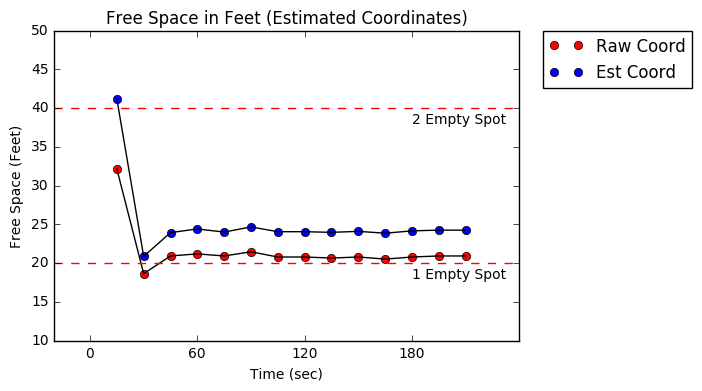

In [83]:
analysis = DataAnalysis()
# print "FrameNum: ", frameNum
# print "RawDistArray: ", arrayTotalFreeSpaceInRawDist
# analysis.showRawDistFreeSpaceGraph(arrayTotalFreeSpaceInRawDist, frameNum)
analysis.showFreeSpaceCoord(arrayTotalFreeSpaceInRawDist, arrayTotalFreeSpaceInEstDist, frameNum)

In [ ]:
scaleFactor = np.array([1.1221122112211221, 1.0060975609756098, 1.0,
                        1.0010111223458038, 1.0,
                        1.0153846153846153, 1.0183767228177643,
                        1.1051574012056262])

sp0raw = np.array([303.0, 656.0, 670.0, 
        989.0, 1000.0,
        1300.0, 1306.0, 
        1493.0])

In [107]:
#Thanks Sam for the help with this part! --Michelle

sp0raw = np.array([8.0, 76.75, 145.5, 214.25, 283.0, 303.0, 
        391.25, 479.5, 567.75, 656.0, 670.0, 749.75,
        829.50, 909.25, 989.0, 1000.0, 1075.00, 1150.0, 
        1225.0, 1300.0, 1306.0, 1352.75, 1399.5, 1446.25,
        1493.0, 1505.0, 1528.25, 1551.50, 1574.75, 1598.0])

# y = np.array([10.0, 90, 170, 250, 330, 340, 420, 500, 580, 660, 
#     670, 750, 830, 910, 990, 1000, 1080, 1160, 1240, 
#     1320, 1330, 1410, 1490, 1570, 1650, 1660, 1740,
#     1820, 1900, 1980])

# scaleFactor = np.array([1.25, 1.1726384364820848, 1.168384879725086, 1.1668611435239207, 1.1660777385159011, 
#         1.1221122112211221, 1.073482428115016, 1.0427528675703859, 1.0215763980625274, 
#         1.0060975609756098, 1.0, 1.0003334444814937, 1.0006027727546716, 1.0008248556502612,
#         1.0010111223458038, 1.0, 1.0046511627906978, 1.008695652173913, 1.0122448979591836,
#         1.0153846153846153, 1.0183767228177643, 1.0423211975605249, 1.064665952125759, 1.0855661192739845,
#         1.1051574012056262, 1.1029900332225913, 1.138557173237363, 1.1730583306477602, 1.2065407207493253,
#         1.2390488110137672])

# #rounded scalefactors
scaleFactor = np.array([1.25, 1.17, 1.17, 1.17, 1.16, 
        1.12, 1.07, 1.04, 1.02, 
        1.01, 1.0, 1.00, 1.00, 1.00,
        1.00, 1.0, 1.00, 1.01, 1.01,
        1.02, 1.02, 1.04, 1.06, 1.09,
        1.11, 1.10, 1.14, 1.17, 1.21,
        1.24])

# scaleFactor = np.array([1.3, 1.2, 1.2, 1.2, 1.2, 
#         1.1, 1.1, 1.0, 1.0, 
#         1.0, 1.0, 1.0, 1.0, 1.0,
#         1.0, 1.0, 1.0, 1.0, 1.0,
#         1.0, 1.0, 1.0, 1.1, 1.1,
#         1.1, 1.1, 1.1, 1.2, 1.2,
#         1.2])

#Endpoints and midpoints
# sp0raw = np.array([8.0, 145.5, 283.0, 
#                    303.0, 479.5, 656.0,
#                    670.0, 829.50, 989.0, 
#                    1000.0, 1150.0, 1300.0, 
#                    1306.0, 1399.5, 1493.0, 
#                    1505.0, 1551.50, 1598.0])

# scaleFactor = np.array([1.25, 1.168384879725086, 1.1660777385159011, 
#                         1.1221122112211221, 1.0427528675703859, 1.0060975609756098,
#                         1.0, 1.0006027727546716, 1.0010111223458038, 
#                         1.0, 1.008695652173913, 1.0153846153846153, 
#                         1.0183767228177643, 1.064665952125759, 1.1051574012056262, 
#                         1.1029900332225913, 1.1730583306477602, 1.2390488110137672])

#Only endpts
# sp0raw = np.array([303.0, 656.0, 670.0, 
#         989.0, 1000.0,
#         1300.0, 1306.0, 
#         1495.0])

# scaleFactor = np.array([1.1221122112211221, 1.0060975609756098, 1.0,
#                         1.0010111223458038, 1.0,
#                         1.0153846153846153, 1.0183767228177643,
#                         1.1051574012056262])


sqrsp0 = np.square(sp0raw)
ones = np.ones_like(sp0raw)

X = np.stack([sp0raw, sqrsp0, ones], axis=1)
print X.shape

w = np.linalg.solve(X.T.dot(X), X.T.dot(scaleFactor))

print w

# test = np.array([303, 303**2, 1])
# test = np.array([989, 989**2, 1])
test = np.array([1, 1**2, 1])

# print wsub
ytest = test.dot(w)

print ytest
print ytest*1

# (30, 3)
# [ -6.41328433e-04   3.65880005e-07   1.26635656e+00]
# 1.12441766821
# 1678.75557864

(30, 3)
[ -6.41328433e-04   3.65880005e-07   1.26635656e+00]
1.26571559648
1.26571559648


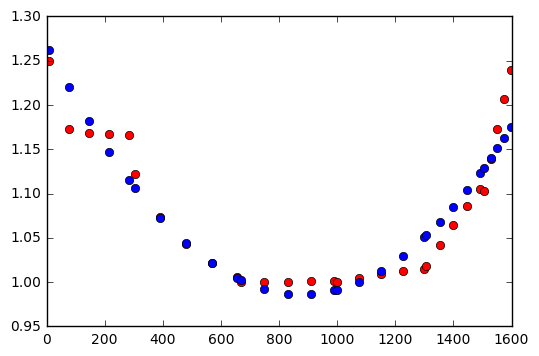

In [31]:
plt.plot(sp0raw, y, 'ro')
plt.plot(sp0raw, X.dot(w), 'bo')

In [17]:
for spots in range(len(allParking.allSpots)):
    print allParking.getSpotCentroid(spots)

[167, 506]
[496, 516]
[833, 518]
[1122, 514]
[1374, 518]
[1531, 511]


In [50]:
def dist(x1, x2, y1, y2):
    return math.sqrt((x2 - x1)**2 + (y2-y1)**2)

# for spots in allParking.allSpots:
# #     print "Spots: ", spots.staticBbox
# #     print "4 x: ", spots.staticBbox[2][0]
# #     print "3 x: ", spots.staticBbox[3][0]
#     print spots.staticBbox[2][0] - spots.staticBbox[3][0]
    
# sum(spots.staticBbox[2][0] - spots.staticBbox[3][0] for spots in allParking.allSpots)/len(allParking.allSpots)

# print (dist(spots.staticBbox[2][0], spots.staticBbox[3][0], spots.staticBbox[2][1], spots.staticBbox[3][1]) for spots in allParking.allSpots)

for spots in allParking.allSpots:
    print dist(spots.staticBbox[2][0], spots.staticBbox[3][0], spots.staticBbox[2][1], spots.staticBbox[3][1])


275.147233313
353.090639921
319.014106271
300.006666593
187.066832977
93.2630687893


In [51]:
sum([353, 319, 300, 187])/4

289

In [ ]:
        
    def dewarp(self, image):
        imageWidth = 1200
        imageHeight = 1600
        
        xstrength = float(1.1)
        ystrength = float(1.0)
        crop = float(0.8)
        
        correctionRadiusX = math.sqrt((imageWidth)**2 + (imageHeight)**2) / xstrength
        correctionRadiusY = math.sqrt((imageWidth)**2 + (imageHeight)**2) / ystrength
        newImg = np.zeros(image.shape, np.uint8)
        
        for x in range(imageWidth-1):
            for y in range(imageHeight-1):
                oldY = y-(imageHeight/2)
                oldX = x-100
                
                distance = math.sqrt(oldX**2 + oldY**2)
                r = distance / correctionRadiusX
                ry = distance / correctionRadiusY
                
                if r == 0:
                    theta = 1
                else:
                    theta = (math.tan(r)/r)
                    thetaY = (math.tan(ry)/ry)
                    
                newXPos = (imageWidth/2) + theta*oldX*crop
                newYPos = (imageHeight/2) + thetaY*oldY*crop
                
                if (newXPos > imageWidth) | (newYPos > imageHeight):
                    pass
                else:
                    newImg[newXPos, newYPos] = image[x, y]
                    
        roi = newImg[500:, 100:1500]
        return roi

xnat:  10.0
xcoord:  8.0
ynat:  545.0
ycoord:  525.0
----------
xnat:  90
xcoord:  76.75
ynat:  545
ycoord:  527.25
----------
xnat:  170
xcoord:  145.5
ynat:  545
ycoord:  529.5
----------
xnat:  250
xcoord:  214.25
ynat:  545
ycoord:  531.75
----------
xnat:  330
xcoord:  283.0
ynat:  545
ycoord:  534.0
----------
allkvals:  [[1.25, 1.0380952380952382], [1.1726384364820848, 1.03366524419156], [1.168384879725086, 1.0292728989612843], [1.1668611435239207, 1.0249177244945933], [1.1660777385159011, 1.0205992509363295]]
1.06105610561
1.01495389332
0.0615223887976


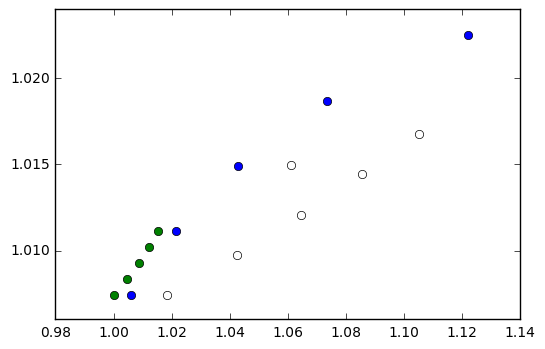

In [121]:
# sp0 = [[8, 525], [10, 545], 
# 	[76.75, 527], [90, 545],
# 	[145.5, 529.5], [170, 545], 
# 	[214.25, 531.75], [250, 545], 
# 	[283, 534], [330, 545]]

# xaxis = [x[0] for x in sp0]
# yaxis = [y[1] for y in sp0]

#-800 8->10
# spot0 = [[0.9974747474747475, 1.0380952380952382], [0.9816799170411338, 1.03366524419156], [0.9625668449197861, 1.0292728989612843], [0.9389671361502347, 1.0249177244945933], [0.9090909090909091, 1.0205992509363295]]
# spot1 = [[0.9255533199195171, 0.8208955223880597], [0.9296636085626911, 0.8461538461538461], [0.9360374414976599, 0.873015873015873], [0.9472551130247578, 0.9016393442622951], [0.9722222222222222, 0.9322033898305084]]
# spot2 = [[1.0, 0.9482758620689655], [0.9950248756218906, 0.9606986899563319], [1.0169491525423728, 0.9734513274336283], [1.0068649885583525, 0.9865470852017937], [1.0052910052910053, 1.0]]
# spot3 = [[1.0, 1.0073937153419594], [1.018181818181818, 1.0083256244218317], [1.0285714285714285, 1.0092592592592593], [1.035294117647059, 1.010194624652456], [1.04, 1.0111317254174397]]
# spot4 = [[1.0474308300395256, 0.9322033898305084], [1.1035730438715514, 0.9128630705394191], [1.1509591326105089, 0.8943089430894309], [1.1914893617021276, 0.8764940239043825], [1.2265512265512266, 0.859375]]
# spot5 = [[1.2198581560283688, 0.8461538461538461], [1.2907655338139374, 0.8239700374531835], [1.3572854291417165, 0.8029197080291971], [1.4198128428525332, 0.7829181494661922], [1.4786967418546366, 0.7638888888888888]]

#-800 10->8
# spot0 = [[1.0025316455696203, 0.963302752293578], [1.018661971830986, 0.9674311926605504], [1.038888888888889, 0.9715596330275229], [1.065, 0.9756880733944954], [1.1, 0.9798165137614679]]
# spot1 = [[1.0804347826086957, 0.9779816513761468], [1.075657894736842, 0.981651376146789], [1.0683333333333334, 0.9853211009174312], [1.0556818181818182, 0.9889908256880734], [1.0285714285714285, 0.9926605504587156]]
# spot2 = [[1.0, 0.9944954128440368], [1.005, 0.9958715596330275], [0.9833333333333333, 0.9972477064220183], [0.9931818181818182, 0.9986238532110092], [0.9947368421052631, 1.0]]
# spot3 = [[1.0, 0.9926605504587156], [0.9821428571428571, 0.9917431192660551], [0.9722222222222222, 0.9908256880733946], [0.9659090909090909, 0.9899082568807339], [0.9615384615384616, 0.9889908256880734]]
# spot4 = [[0.9547169811320755, 0.9926605504587156], [0.9061475409836065, 0.9903669724770642], [0.868840579710145, 0.9880733944954129], [0.8392857142857143, 0.9857798165137615], [0.8152941176470588, 0.9834862385321101]]
# spot5 = [[0.8197674418604651, 0.981651376146789], [0.7747340425531914, 0.978440366972477], [0.736764705882353, 0.9752293577981651], [0.7043181818181818, 0.9720183486238532], [0.676271186440678, 0.9688073394495413]]

#10->8
# spot0 = [[0.8, 0.963302752293578], [0.8527777777777777, 0.9674311926605504], [0.8558823529411764, 0.9715596330275229], [0.857, 0.9756880733944954], [0.8575757575757575, 0.9798165137614679]]
# spot1 = [[0.8911764705882353, 0.9779816513761468], [0.9315476190476191, 0.981651376146789], [0.959, 0.9853211009174312], [0.9788793103448276, 0.9889908256880734], [0.9939393939393939, 0.9926605504587156]]
# spot2 = [[1.0, 0.9944954128440368], [0.9996666666666667, 0.9958715596330275], [0.9993975903614458, 0.9972477064220183], [0.9991758241758242, 0.9986238532110092], [0.998989898989899, 1.0]]
# spot3 = [[1.0, 0.9926605504587156], [0.9953703703703703, 0.9917431192660551], [0.9913793103448276, 0.9908256880733946], [0.9879032258064516, 0.9899082568807339], [0.9848484848484849, 0.9889908256880734]]
# spot4 = [[0.9819548872180451, 0.9926605504587156], [0.9593971631205673, 0.9903669724770642], [0.939261744966443, 0.9880733944954129], [0.9211783439490446, 0.9857798165137615], [0.9048484848484849, 0.9834862385321101]]
# spot5 = [[0.9066265060240963, 0.981651376146789], [0.8783045977011494, 0.978440366972477], [0.8524725274725274, 0.9752293577981651], [0.8288157894736842, 0.9720183486238532], [0.807070707070707, 0.9688073394495413]]


#8->10
spot0 = [[1.25, 1.0380952380952382], [1.1726384364820848, 1.03366524419156], [1.168384879725086, 1.0292728989612843], [1.1668611435239207, 1.0249177244945933], [1.1660777385159011, 1.0205992509363295]]
spot1 = [[1.1221122112211221, 1.022514071294559], [1.073482428115016, 1.0186915887850467], [1.0427528675703859, 1.0148975791433892], [1.0215763980625274, 1.0111317254174397], [1.0060975609756098, 1.0073937153419594]]
spot2 = [[1.0, 1.0055350553505535], [1.0003334444814937, 1.0041455550437586], [1.0006027727546716, 1.0027598896044159], [1.0008248556502612, 1.0013780431786863], [1.0010111223458038, 1.0]]
spot3 = [[1.0, 1.0073937153419594], [1.0046511627906978, 1.0083256244218317], [1.008695652173913, 1.0092592592592593], [1.0122448979591836, 1.010194624652456], [1.0153846153846153, 1.0111317254174397]]
spot4 = [[1.0183767228177643, 1.0073937153419594], [1.0423211975605249, 1.0097267253358035], [1.064665952125759, 1.012070566388115], [1.0855661192739845, 1.0144253140995811], [1.1051574012056262, 1.0167910447761195]]
spot5 = [[1.1029900332225913, 1.0186915887850467], [1.138557173237363, 1.0220346929207689], [1.1730583306477602, 1.0253998118532455], [1.2065407207493253, 1.028787163756489], [1.2390488110137672, 1.0321969696969697]]

k = 0
Y = 0

#spot0
sp0raw = [[8.0, 525.0], [76.75, 527.25], [145.5, 529.5], [214.25, 531.75], [283.0, 534.0]]
sp0tick = [[10.0, 545.0], [90, 545], [170, 545], [250, 545], [330, 545]]
# sp0tick = [[8.0, 525.0], [76.75, 527.25], [145.5, 529.5], [214.25, 531.75], [283.0, 534.0]]
# sp0raw = [[10.0, 545.0], [90, 545], [170, 545], [250, 545], [330, 545]]

kmatrix = [[k, 0],[0, Y]]
allkvals = []

#spot1
# sp0raw = [[303.0, 533.0], [391.25, 535.0], [479.5, 537.0], [567.75, 539.0], [656.0, 541.0]]
# sp0tick = [[340, 545], [420, 545], [500, 545], [580, 545], [660, 545]]
# sp0tick = [[303.0, 533.0], [391.25, 535.0], [479.5, 537.0], [567.75, 539.0], [656.0, 541.0]]
# sp0raw = [[340, 545], [420, 545], [500, 545], [580, 545], [660, 545]]

#spot2
# sp0raw = [[670.0, 542.0], [749.75, 542.75], [829.50, 543.5], [909.25, 544.25], [989.0, 545.0]]
# sp0tick = [[670, 545], [750, 545], [830, 545], [910, 545], [990, 545]]
# sp0tick = [[670.0, 542.0], [749.75, 542.75], [829.50, 543.5], [909.25, 544.25], [989.0, 545.0]]
# sp0raw = [[670, 545], [750, 545], [830, 545], [910, 545], [990, 545]]

#spot3
# sp0raw = [[1000.0, 541.0], [1075.00, 540.5], [1150.0, 540.0], [1225.0, 539.5], [1300.0, 539.0]]
# sp0tick = [[1000, 545], [1080, 545], [1160, 545], [1240, 545], [1320, 545]]
# sp0tick = [[1000.0, 541.0], [1075.00, 540.5], [1150.0, 540.0], [1225.0, 539.5], [1300.0, 539.0]]
# sp0raw = [[1000, 545], [1080, 545], [1160, 545], [1240, 545], [1320, 545]]

# #spot4
# sp0raw = [[1306.0, 541.0], [1352.75, 539.75], [1399.5, 538.5], [1446.25, 537.25], [1493.0, 536.0]]
# sp0tick = [[1330, 545], [1410, 545], [1490, 545], [1570, 545], [1650, 545]]
# sp0tick = [[1306.0, 541.0], [1352.75, 539.75], [1399.5, 538.5], [1446.25, 537.25], [1493.0, 536.0]]
# sp0raw = [[1330, 545], [1410, 545], [1490, 545], [1570, 545], [1650, 545]]

# #spot5
# sp0raw = [[1505.0, 535.0], [1528.25, 533.25], [1551.50, 531.50], [1574.75, 529.75], [1598.0, 528.0]]
# sp0tick = [[1660, 545], [1740, 545], [1820, 545], [1900, 545], [1980, 545]]
# sp0tick = [[1505.0, 535.0], [1528.25, 533.25], [1551.50, 531.50], [1574.75, 529.75], [1598.0, 528.0]]
# sp0raw = [[1660, 545], [1740, 545], [1820, 545], [1900, 545], [1980, 545]]

def solveLinear (xcoord, ycoord, xnat, ynat):
#     kxvalue = float((xnat - (kmatrix[0][1]*ycoord))/xcoord)
#     kyvalue = float((ynat - (kmatrix[1][0]*xcoord))/ycoord)
    print "xnat: ", xnat
    print "xcoord: ", xcoord
    print "ynat: ", ynat
    print "ycoord: ", ycoord
    print "----------"

    kxvalue = (xnat/xcoord)
    kyvalue = (ynat/ycoord)
    
    return [kxvalue, kyvalue]

for value in range(len(sp0tick)):
#     print "raw x: ", sp0raw[value][0]
#     print "-800: ", sp0raw[value][0]-800
#     print "raw y: ", sp0tick[value][1]
    
    kvals = solveLinear((sp0raw[value][0]), (sp0raw[value][1]), (sp0tick[value][0]), (sp0tick[value][1]))
    allkvals.append(kvals)
    
    
print "allkvals: ", allkvals

# axis = [-50, 400, 515, 550]
# plt.axis(axis)

# axis = [1.15, 1.30, 1.15, 1.30]
# plt.axis(axis)

xaxistick = [x[0] for x in sp0tick]
yaxistick = [y[1] for y in sp0tick]
xaxisraw = [x[0] for x in sp0raw]
yaxisraw = [y[1] for y in sp0raw]

xaxiskval = [x[0] for x in allkvals]
yaxiskval = [y[0] for y in allkvals]

xspot0 = [x[0] for x in spot0]
yspot0 = [y[1] for y in spot0]
xspot1 = [x[0] for x in spot1]
yspot1 = [y[1] for y in spot1]
xspot2 = [x[0] for x in spot2]
yspot2 = [y[1] for y in spot2]
xspot3 = [x[0] for x in spot3]
yspot3 = [y[1] for y in spot3]
xspot4 = [x[0] for x in spot4]
yspot4 = [y[1] for y in spot4]
xspot5 = [x[0] for x in spot5]
yspot5 = [y[1] for y in spot5]
# print xaxistick
# print yaxistick
# print xaxisraw
# print yaxisraw

# plt.plot(xaxistick, yaxistick, 'bo')
# plt.plot(xaxisraw, yaxisraw, 'ro')
# plt.plot(xaxiskval, yaxiskval, 'yo')

# plt.plot(xspot0, yspot0, 'ro')
plt.plot(xspot1, yspot1, 'bo')
# plt.plot(xspot2, yspot2, 'yo')
plt.plot(xspot3, yspot3, 'go')
plt.plot(xspot4, yspot4, 'wo')
# plt.plot(xspot5, yspot5, 'bo')



bigblue = [1.1221122112211221, 1.022514071294559]
smolgreen = [1.0, 1.0073937153419594]

mdx = (bigblue[0]+smolgreen[0])/2
mdy = (bigblue[1]+smolgreen[1])/2
print mdx
print mdy

plt.plot(mdx, mdy, 'wo')



distx = math.sqrt((bigblue[0]-mdx)**2 + (bigblue[1]-mdy)**2)
print distx

distx = math.sqrt((bigblue[0]-mdx)**2 + (bigblue[1]-mdy)**2)
print distx